Gib das Stocksymbol ein:  NVDA


Aktueller Aktienkurs von NVDA (Yahoo Finance): 138.07000732421875
Gewinn pro Aktie (EPS) von NVDA: 2.13
Das P/E-Verhältnis von NVDA: 64.82159968273182


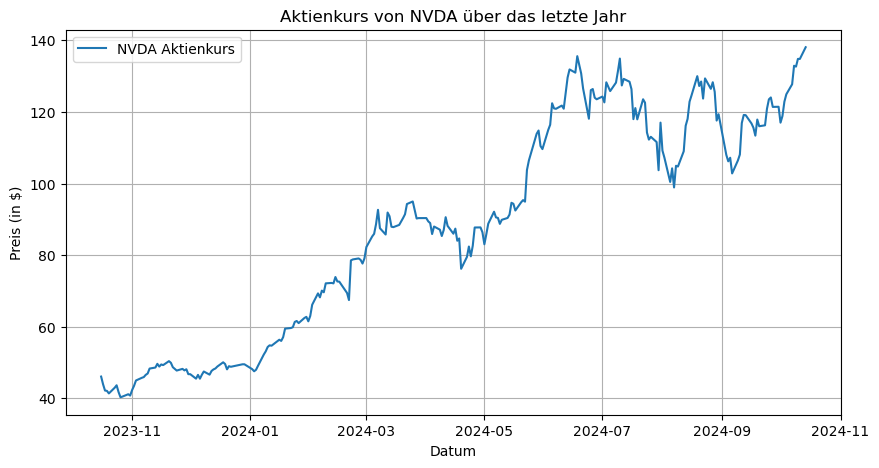

Verfügbare Cashflow-Spalten: DatetimeIndex(['2024-01-31', '2023-01-31', '2022-01-31', '2021-01-31',
               '2020-01-31'],
              dtype='datetime64[ns]', freq=None)
Spalte 'Total Cash From Operating Activities' nicht gefunden, überprüfe die verfügbaren Spalten.
Keine DCF-Berechnung möglich, da der freie Cashflow nicht verfügbar ist.


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Benutzer gibt das Stocksymbol ein
stock_symbol = input("Gib das Stocksymbol ein: ")

# Abrufen der Daten von Yahoo Finance (z.B. EPS und Aktienkurs)
yahoo_stock = yf.Ticker(stock_symbol)

# Abrufen des historischen Aktienkurses
stock_data = yahoo_stock.history(period="1y")  # Hole 1 Jahr historische Daten

# Abrufen des aktuellen Aktienkurses und EPS von Yahoo Finance
current_price_yahoo = stock_data['Close'].iloc[-1]  # Verwende iloc für den positionsbasierten Zugriff
eps_yahoo = yahoo_stock.info.get('trailingEps')

# Anzeige des aktuellen Aktienkurses von Yahoo Finance
print(f"Aktueller Aktienkurs von {stock_symbol} (Yahoo Finance): {current_price_yahoo}")
print(f"Gewinn pro Aktie (EPS) von {stock_symbol}: {eps_yahoo}")

# Berechnung des P/E-Verhältnisses
if eps_yahoo:
    pe_ratio = current_price_yahoo / eps_yahoo
else:
    pe_ratio = 'Nicht verfügbar'

print(f"Das P/E-Verhältnis von {stock_symbol}: {pe_ratio}")

# Plot des historischen Aktienkurses
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_symbol} Aktienkurs')
plt.title(f'Aktienkurs von {stock_symbol} über das letzte Jahr')
plt.xlabel('Datum')
plt.ylabel('Preis (in $)')
plt.grid(True)
plt.legend()
plt.show()

# Abrufen des Cashflow-Datensatzes von Yahoo Finance (falls benötigt)
cashflow_data = yahoo_stock.cashflow
print("Verfügbare Cashflow-Spalten:", cashflow_data.columns)

# Versuche, die Spalte 'Total Cash From Operating Activities' zu finden
if 'Total Cash From Operating Activities' in cashflow_data.columns:
    free_cash_flow_yahoo = cashflow_data.loc[:, 'Total Cash From Operating Activities'].iloc[0]
else:
    print("Spalte 'Total Cash From Operating Activities' nicht gefunden, überprüfe die verfügbaren Spalten.")
    free_cash_flow_yahoo = None

# DCF-Berechnung (nur wenn Free Cash Flow verfügbar ist)
if free_cash_flow_yahoo:
    discount_rate = 0.10  # Beispielsweise 10 %
    growth_rate = 0.03    # Beispielhafte Wachstumsrate von 3 %
    years = 5             # DCF über 5 Jahre

    cash_flows = []
    for year in range(1, years + 1):
        cash_flow_future = free_cash_flow_yahoo * (1 + growth_rate) ** year
        discounted_cash_flow = cash_flow_future / (1 + discount_rate) ** year
        cash_flows.append(discounted_cash_flow)

    terminal_value = cash_flows[-1] * (1 + growth_rate) / (discount_rate - growth_rate)
    total_dcf_value = sum(cash_flows) + terminal_value

    print(f"Der geschätzte DCF-Wert von {stock_symbol}: {total_dcf_value:.2f}")

    # Grafische Darstellung der Cashflows
    years_range = np.arange(1, years + 1)
    plt.figure(figsize=(10, 5))
    plt.plot(years_range, cash_flows, label='Discounted Cash Flows', marker='o')
    plt.title(f'Discounted Cash Flows (DCF) über {years} Jahre für {stock_symbol}')
    plt.xlabel('Jahr')
    plt.ylabel('Discounted Cash Flow (in $)')
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("Keine DCF-Berechnung möglich, da der freie Cashflow nicht verfügbar ist.")
